## Импортируем модули для работы с данными

In [480]:
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;
import plotly.express as px

Считаем датасет

In [481]:
df = pd.read_csv('train_new.csv')

Выведем 5 первых строчек из датасета

In [482]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Визуализируем распределение значений признаков Survived, Pclass, Age, Sex. Parch

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


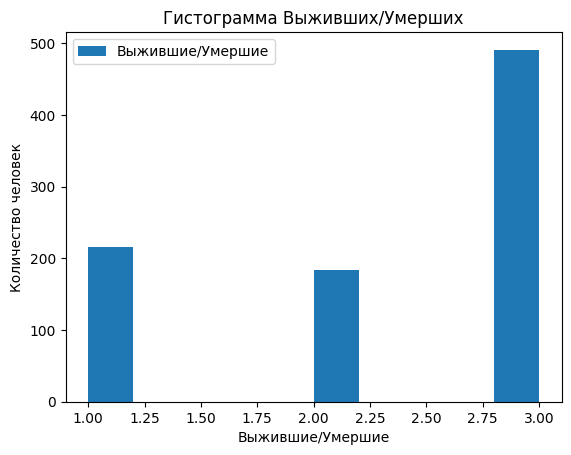

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


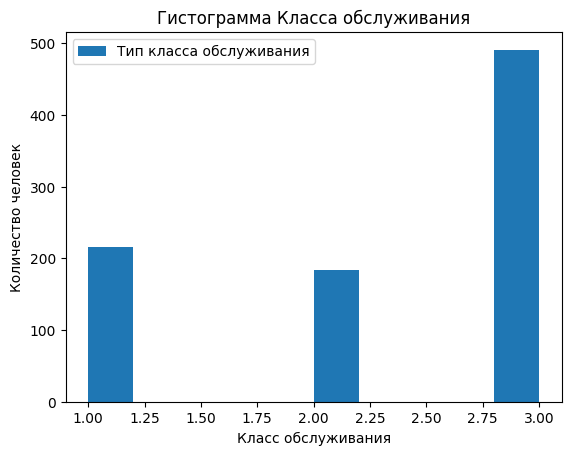

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


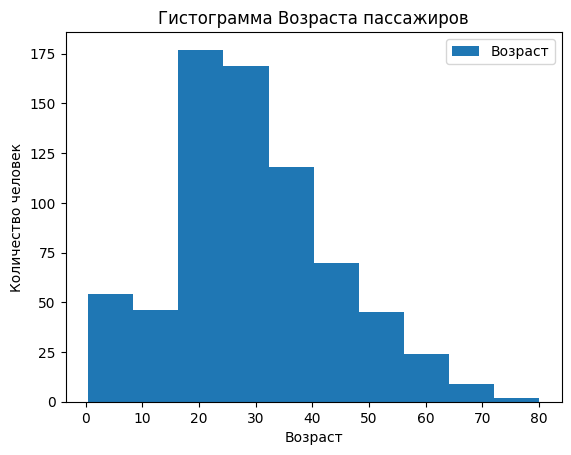

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


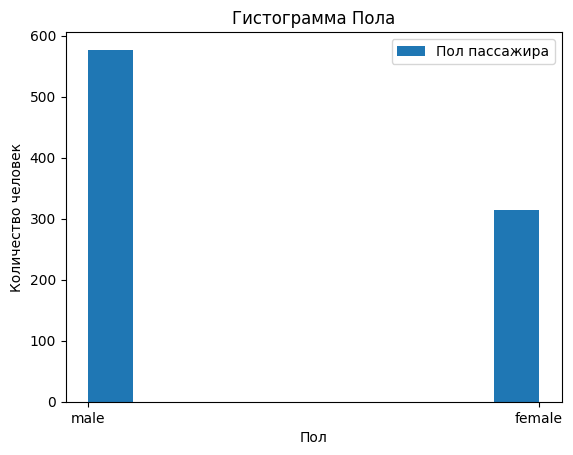

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


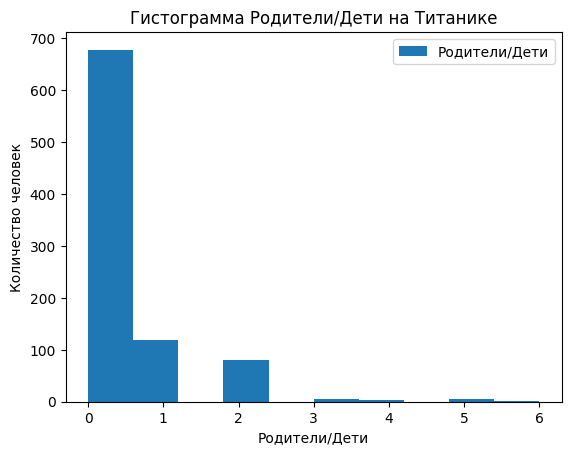

In [483]:
x1 = df["Survived"]
x2 = df["Pclass"]
x3 = df["Age"]
x4 = df["Sex"]
x5 = df["Parch"]

fig, ax1 = plt.subplots()
ax1.hist(x2)
ax1.legend(prop={'size': 10})
ax1.set_title('Гистограмма Выживших/Умерших')
ax1.set_xlabel('Выжившие/Умершие')
ax1.set_ylabel('Количество человек')
labels = ["Выжившие/Умершие"]
plt.legend(labels)
plt.show()

fig, ax2 = plt.subplots()
ax2.hist(x2)
ax2.legend(prop={'size': 10})
ax2.set_title("Гистограмма Класса обслуживания")
ax2.set_xlabel("Класс обслуживания")
ax2.set_ylabel("Количество человек")
labels = ["Тип класса обслуживания"]
plt.legend(labels)
plt.show()

fig, ax3 = plt.subplots()
ax3.hist(x3)
ax3.legend(prop={"size": 10})
ax3.set_title('Гистограмма Возраста пассажиров')
ax3.set_xlabel('Возраст')
ax3.set_ylabel('Количество человек')
labels = ["Возраст"]
plt.legend(labels)
plt.show()

fig, ax4 = plt.subplots()
ax4.hist(x4)
ax4.legend(prop={'size': 10})
ax4.set_title('Гистограмма Пола')
ax4.set_xlabel('Пол')
ax4.set_ylabel('Количество человек')
labels = ["Пол пассажира"]
plt.legend(labels)
plt.show()

fig, ax5 = plt.subplots()
ax5.hist(x5)
ax5.legend(prop={'size': 10})
ax5.set_title('Гистограмма Родители/Дети на Титанике')
ax5.set_xlabel('Родители/Дети')
ax5.set_ylabel('Количество человек')
labels = ["Родители/Дети"]
plt.legend(labels)
plt.show()

График Age - является непрерывной и не имеет особых выбросов (0 или отрицательные числа), график представляет собой положительну ассиметрию

## Построим график типа boxplot для столбца Age

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


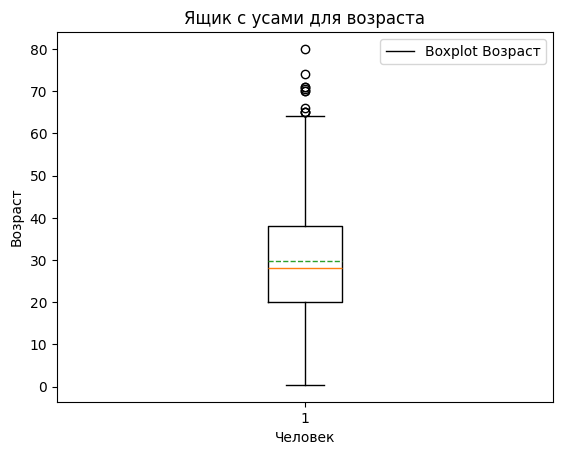

In [484]:

x = df["Age"].dropna()

fig, ax = plt.subplots()
ax.boxplot(x, showmeans=True, meanline=True)
ax.legend(prop={'size': 10})
ax.set_title('Ящик с усами для возраста')
ax.set_xlabel('Человек')
ax.set_ylabel('Возраст')
labels = ["Boxplot Возраст"]
plt.legend(labels)
plt.show()

График показал выбросы после 65 лет, но их не будем удалять, так как это приемлемые значения возроста для человека. Средний возраст равен 28 годам. 

## Построим график типа pie chart для переменных Survived, Pclass

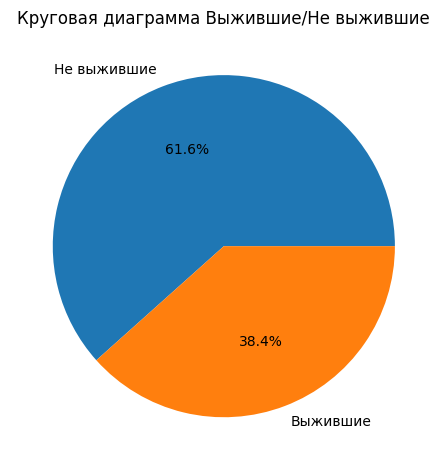

In [485]:
df_per_survived = df.groupby(['Survived']).size().reset_index(name='Count')
labels = [f'{"Выжившие" if survived == 1 else "Не выжившие"}'
          for survived in df_per_survived[['Survived']].values]
fig, ax = plt.subplots()
ax.set_title('Круговая диаграмма Выжившие/Не выжившие')
ax.pie(df_per_survived["Count"], labels=labels, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [486]:
def getLabels(df):
    out = []
    for pclass in df["Pclass"].values:
        if pclass == 1:
            out.append("Первый класс обслуживания")
        elif pclass == 2:
            out.append("Второй класс обслуживания")
        else:
            out.append("Третий класс обслуживания")
    return out

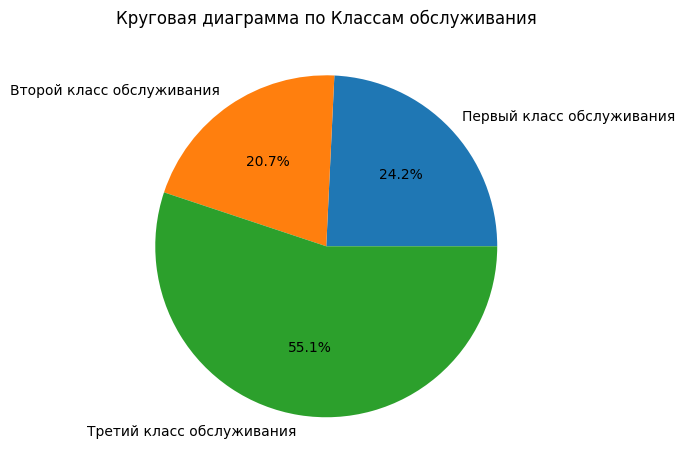

In [487]:
df_per_pclass = df.groupby(['Pclass']).size().reset_index(name='Count')
labels = getLabels(df_per_pclass)
fig, ax = plt.subplots()
ax.set_title('Круговая диаграмма по Классам обслуживания')
ax.pie(df_per_pclass["Count"], labels=labels, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

## Построим график типа pairplot для всех числовых переменных датасета

Сохраним и выведем все колонки которые относятся к числовому типу

In [488]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


Сохраним и выведем все не числовые колонки

In [489]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Выведем пропуски данных для числовых колонок

In [490]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Подсчитаем общее количестов пропущенных данных

In [491]:
num_missing = df.isna().sum()
num_missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Выведем графическое представление данных (желтый - пропуски в данных, синий - нет пропусков в данных)

<Axes: >

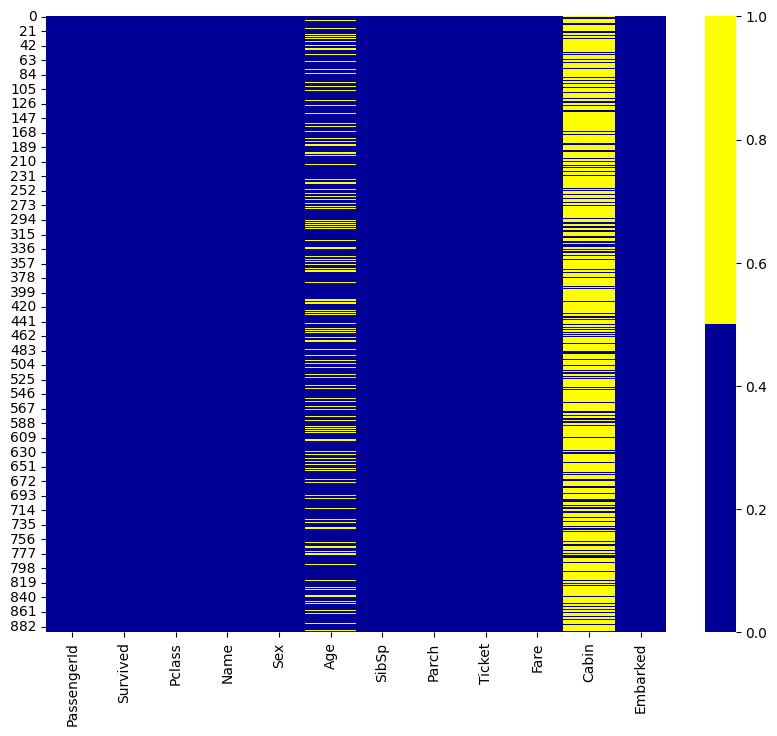

In [492]:
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

Заменим все пропуски в данных для числовых данных - медианой, для не числовых данных 'NA' (нет данных)

In [493]:
def check_pass_obj(df):
    if isinstance(df, pd.DataFrame):
        return True
    else:
        return False
    

def change_missing_values_non_numeric_by_const(df, cols_to_fill):
    if check_pass_obj(df):
        for col in cols_to_fill:
            df[col] = df[col].fillna('NA')
    else:
        raise TypeError("Data must be a Pandas DataFrame")
    

def change_missing_values_numeric_by_const(df, cols_to_fill):
    if check_pass_obj(df):
        for col in cols_to_fill:
            med = df[col].median()
            df[col] = df[col].fillna(med)
    else:
        raise TypeError("Data must be a Pandas DataFrame")
    

lst_numeric_for_fill = []
lst_non_numeric_for_fill = []

lst_input = ['Age', 'Cabin']

for col in lst_input:
    if col in non_numeric_cols:
        lst_non_numeric_for_fill.append(col)
    if col in numeric_cols:
        lst_numeric_for_fill.append(col)
    if len(lst_non_numeric_for_fill) > 0:
        change_missing_values_non_numeric_by_const(df, lst_non_numeric_for_fill)
        change_missing_values_non_numeric_by_const(df, lst_non_numeric_for_fill)
    if len(lst_numeric_for_fill) > 0:
        change_missing_values_numeric_by_const(df, lst_numeric_for_fill)
        change_missing_values_numeric_by_const(df, lst_numeric_for_fill)

Проверяем корректность заполнения пропусков

In [494]:
print(df['Age'].unique())
print(df['Cabin'].unique())

[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
['NA' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82'

Создадим датасет только из числовых колонок

In [495]:
train_df = df.drop(columns=non_numeric_cols)

In [496]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


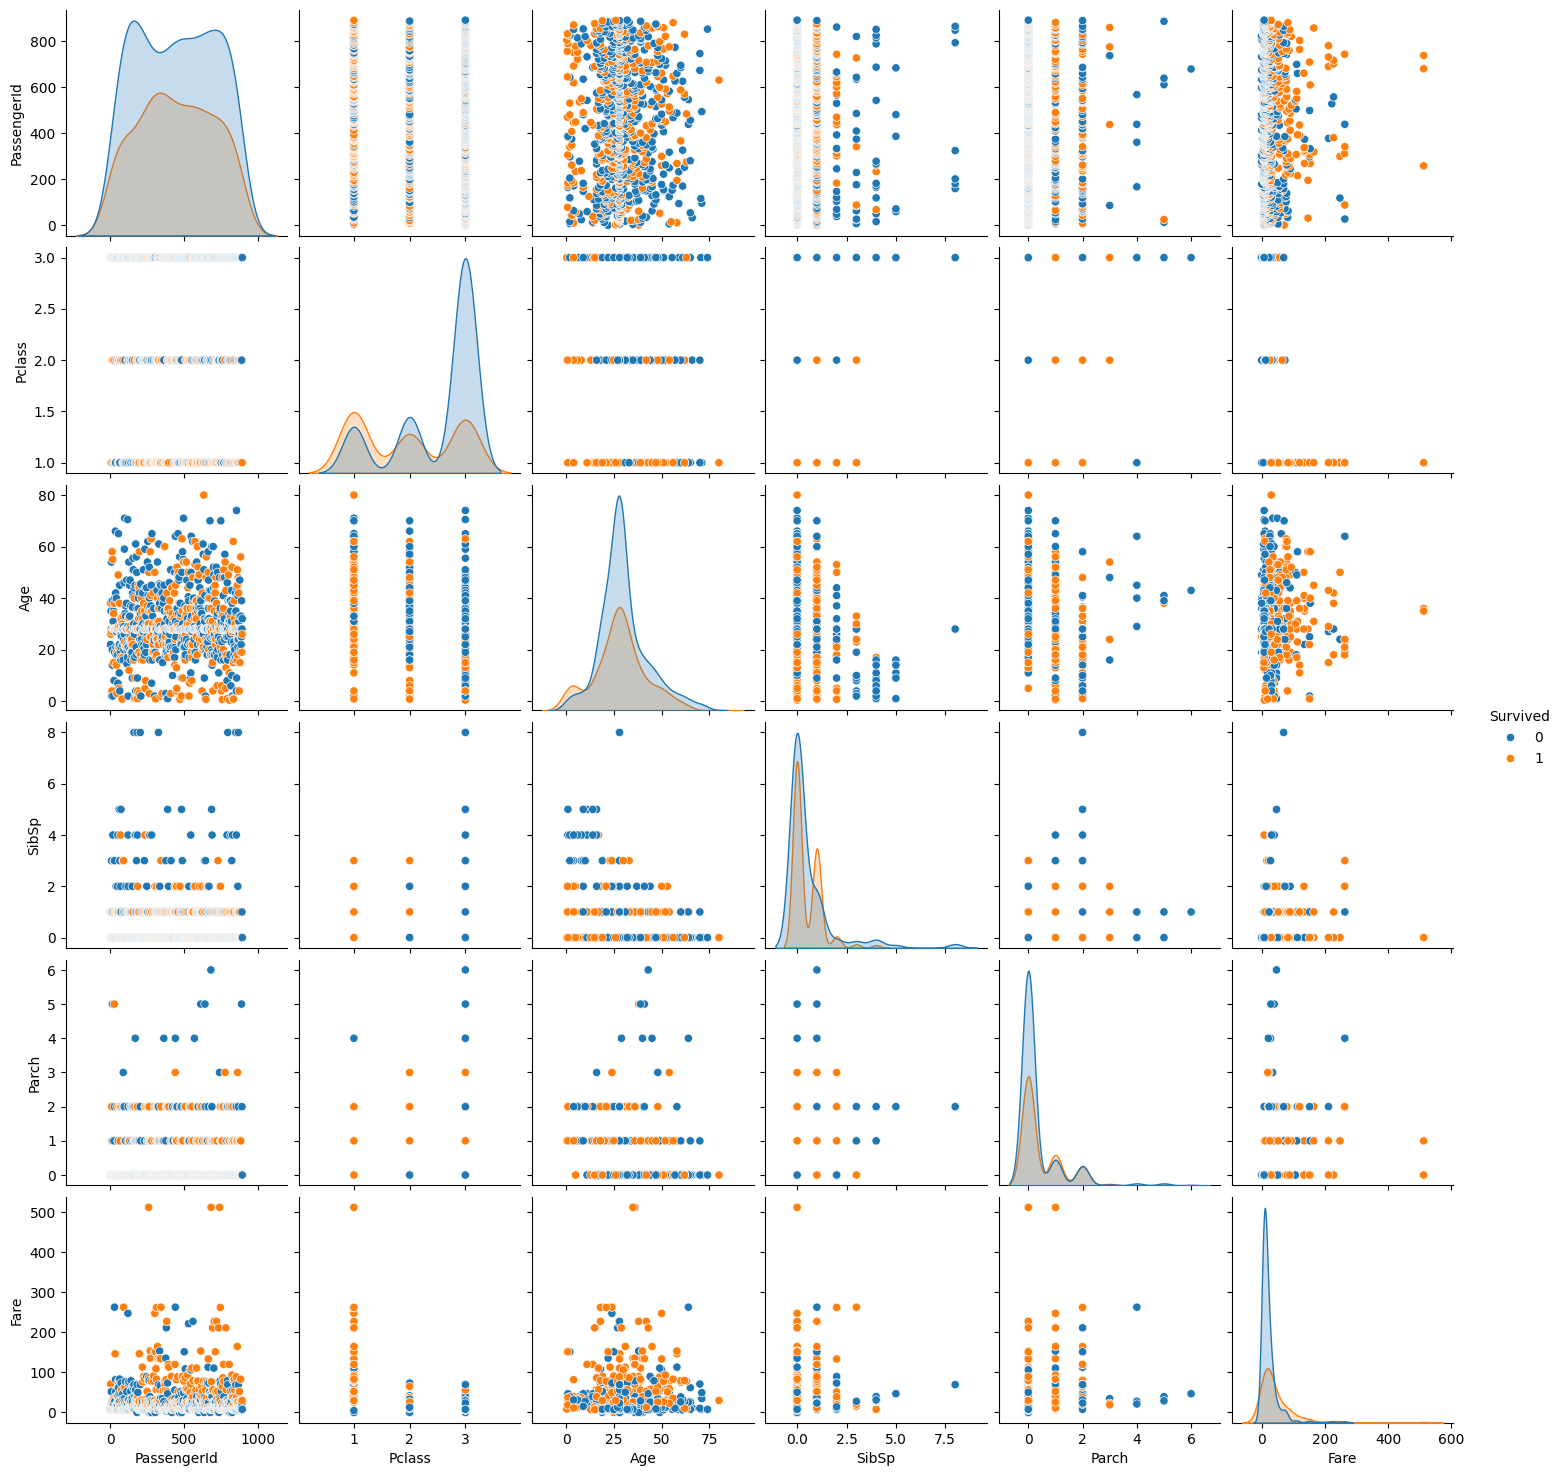

In [497]:
sns.pairplot(train_df, hue="Survived")

## Построим интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [498]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S


In [499]:
df.shape

(891, 12)

In [500]:
total_passenger = df["PassengerId"].count(); #Общее количество

In [501]:
pclass_passenger = round(df.groupby("Pclass")["Pclass"].count() * 100 / total_passenger, 2)
pclass_passenger

Pclass
1    24.24
2    20.65
3    55.11
Name: Pclass, dtype: float64

In [502]:
pclass_sex = round(df.groupby(["Sex", "Pclass"])["Pclass"].count() * 100 / total_passenger, 2)
pclass_sex

Sex     Pclass
female  1         10.55
        2          8.53
        3         16.16
male    1         13.69
        2         12.12
        3         38.95
Name: Pclass, dtype: float64

In [503]:
data = dict(
    categories=["Всего", "Первый класс", "Второй класс", "Третий класс", "Мужчины 1 Класс", "Женщины 1 Класс", "Мужчины 2 Класс", "Женщины 2 Класс", "Мужчины 3 Класс", "Женщины 3 Класс"],
    parent=["", "Всего", "Всего", "Всего", "Первый класс", "Первый класс", "Второй класс", "Второй класс", "Третий класс", "Третий класс"],
    value=[100, pclass_passenger.iloc[0], pclass_passenger.iloc[1], pclass_passenger.iloc[2], pclass_sex.iloc[3], pclass_sex.iloc[0], pclass_sex.iloc[4], pclass_sex.iloc[1], pclass_sex.iloc[5], pclass_sex.iloc[2]])


fig = px.sunburst(data, names='categories', parents='parent', values='value', branchvalues='total', title='Интерактивная круговая диаграмма мужчин и женщин в каждом классе обслуживания')
fig.show()